0.8345924697500153
0.8228610036238561
0.7699772741232112
0.8027762422455623


Text(0.5,1,'Logistic Regression')

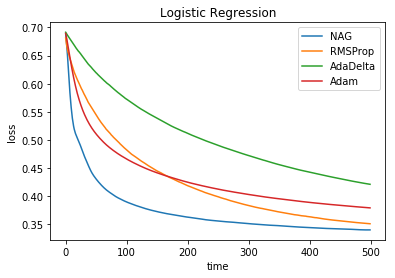

In [10]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import numpy.linalg as nl
import matplotlib.pyplot as plt
import random
%matplotlib inline

x_train,y_train = load_svmlight_file("a9a")
x_test, y_test = load_svmlight_file('a9a.t')
for i in range(0, len(y_train)):
    if y_train[i]==-1:
        y_train[i]=0
for i in range(0,len(y_test)):
    if y_test[i]==-1:
        y_test[i]=0
        

temp =(np.ones((x_train.shape[0],1)))
x_train=np.c_[x_train.A,temp]
x_test=np.c_[x_test.A,np.zeros((x_test.shape[0],1)),np.ones((x_test.shape[0],1))]
# y_train=y_train.reshape(len(y_train),-1)
#初始化全零
w1=np.zeros(x_train.shape[1])
w2=w1
w3=w1
w4=w1



#迭代次数
num=500
#阀值
threshold=0.5

loss_test={'NAG':[],'RMSProp':[],'AdaDelta':[],'Adam':[]}

#目标函数
def target(x,w):
    return 1/(1+np.exp(-w.dot(x)))

#loss函数
def loss(x,y,w):
    temp=0
    for i in range(len(x)):
        temp+=y[i] * np.log(target(x[i],w)) + (1 - y[i]) * np.log(1 - target(x[i],w))
    return -temp/len(x)

#求梯度
def gradient(x,y,w):
    g=0
    #随机选取样本
    rand=random.sample(range(len(x)),200)
    for i in rand:
        g+=(target(x[i],w)-y[i])*x[i]
    return g/len(rand)

#NAG
def NAG(w):
    V=0
    learning_rate=0.01
    y=0.9
    for i in range(num):
        grad=gradient(x_train,y_train,w-y*V)
        V=y*V+learning_rate*grad
        w=w-V
        loss_test['NAG'].append(loss(x_test,y_test,w))
    return w

#RMSProp
def RMSProp(w):
    G=0
    learning_rate=0.001
    y=0.9
    for i in range(num):
        grad=gradient(x_train,y_train,w)
        G=y*G+(1-y)*(grad*grad)
        w=w-(learning_rate/np.sqrt(G+(1e-8))*grad)
        loss_test['RMSProp'].append(loss(x_test,y_test,w))
    return w

#AdaDelta
def AdaDelta(w):
    G=0
    delta_t=0
    y=0.95
    for i in range(num):
        grad=gradient(x_train,y_train,w)
        G=y*G+(1-y)*(grad*grad)
        delta_w=grad*np.sqrt(delta_t+1e-8)/np.sqrt(G+1e-8)
        w=w-delta_w
        delta_t=y*delta_t+(1-y)*delta_w*delta_w
        loss_test['AdaDelta'].append(loss(x_test,y_test,w))
    return w

def Adam(w):
    b=0.9
    m=0
    G=0
    learning_rate=0.001
    y=0.999
    for i in range(num):
        grad=gradient(x_train,y_train,w)
        m=b*m+(1-b)*grad
        G=y*G+(1-y)*grad*grad
        a=learning_rate*np.sqrt(1-y)/(1-b)
        w=w-a*m/np.sqrt(G+1e-8)
        loss_test['Adam'].append(loss(x_test,y_test,w))
    return w
    
w1=NAG(w1)
w2=RMSProp(w2)
w3=AdaDelta(w3)
w4=Adam(w4)
#验证集命中率
test_hit1=0
test_hit2=0
test_hit3=0
test_hit4=0

for i in range(len(x_test)):
    if (np.dot(x_test[i],w1) >= threshold and y_test[i] == 1) or (np.dot(x_test[i],w1) < threshold and y_test[i] == 0):
        test_hit1 += 1
    if (np.dot(x_test[i],w2) >= threshold and y_test[i] == 1) or (np.dot(x_test[i],w2) < threshold and y_test[i] == 0):
        test_hit2 += 1  
    if (np.dot(x_test[i],w3) >= threshold and y_test[i] == 1) or (np.dot(x_test[i],w3) < threshold and y_test[i] == 0):
        test_hit3 += 1
    if (np.dot(x_test[i],w4) >= threshold and y_test[i] == 1) or (np.dot(x_test[i],w4) < threshold and y_test[i] == 0):
        test_hit4 += 1

print(test_hit1/len(x_test))
print(test_hit2/len(x_test))
print(test_hit3/len(x_test))
print(test_hit4/len(x_test))

n = np.arange(num)
plt.plot(n,loss_test['NAG'],label='NAG')
plt.plot(n,loss_test['RMSProp'],label='RMSProp')
plt.plot(n,loss_test['AdaDelta'],label='AdaDelta')
plt.plot(n,loss_test['Adam'],label='Adam')

plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')
plt.title('Logistic Regression')